In [ ]:
!pip install nlp_id

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 85.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=63cb4d2446ef43ea65730e0a1cd6d374ff69211fefc317a902918ba7807b4090
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.1
    Uninstalling huggingface-hub-0.27.1:
      Successfully uninstalled huggingface-hub-0.27.1
ERROR: pip's dependency resolver does not currently take into account all the pac

In [ ]:
!pip install indoNLP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import string
import re
import nltk
from nltk.corpus import stopwords
from indoNLP.preprocessing import replace_slang
from indoNLP.preprocessing import emoji_to_words
from indoNLP.preprocessing import replace_word_elongation
# from emoticon import emoticon
from nlp_id.lemmatizer import Lemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv("dataskripsi.csv", sep=",", on_bad_lines='skip', engine="python")  # Add error handling
df = df[["text", "final_sentiment"]]
df

,text,final_sentiment
0,hal ini jadi bikin tambah pengen beli mcdonalds,-1
1,orang dan anda post hal yang lagi di boikotin ...,-1
2,bayangin nih yaw anda support idol anda dari f...,1
3,Gerakan boikot ini hanya membuat pengusaha fra...,-1
4,beli berubah jangan kentang kopi ayo tugas sa...,-1
...,...,...
22421,Boikot McDonald's justru kontraproduktif karen...,-1
22422,selamat buat pelaku industri konsumsian rusia ...,1
22423,mah itu masih orang ditegur lain mcdonalds iya...,1
22424,Tidak setuju dengan boikot karena pekerja paru...,-1


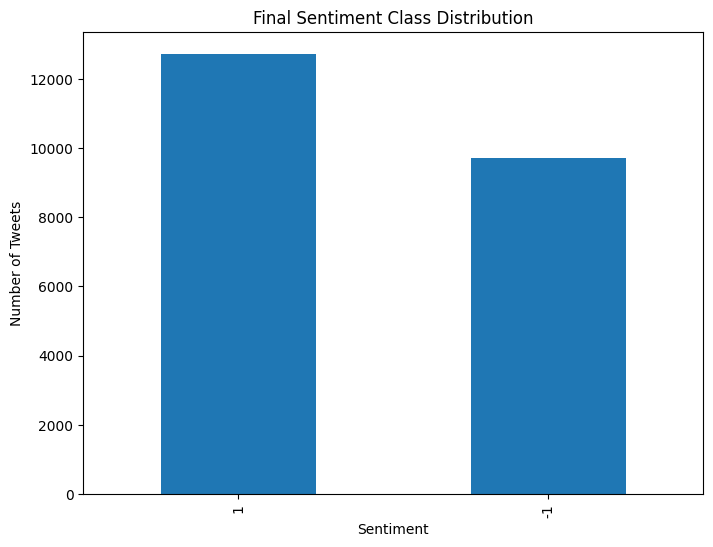

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = df['final_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Final Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

## Case Folding
Mengubah semua huruf kapital menjadi huruf non kapital

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())
df

,text,final_sentiment
0,hal ini jadi bikin tambah pengen beli mcdonalds,-1
1,orang dan anda post hal yang lagi di boikotin ...,-1
2,bayangin nih yaw anda support idol anda dari f...,1
3,gerakan boikot ini hanya membuat pengusaha fra...,-1
4,beli berubah jangan kentang kopi ayo tugas sa...,-1
...,...,...
22421,boikot mcdonald's justru kontraproduktif karen...,-1
22422,selamat buat pelaku industri konsumsian rusia ...,1
22423,mah itu masih orang ditegur lain mcdonalds iya...,1
22424,tidak setuju dengan boikot karena pekerja paru...,-1


# Stopword Removal
Menghapius semua kata yang tidak bermakna

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
set_stopwords = set(stopwords.words('indonesian'))
print(len(set_stopwords))

757


In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in set_stopwords]
    return ' '.join(filtered_words)


In [ ]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))
df

,text,final_sentiment
0,bikin pengen beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayangin nih yaw support idol finansial yaw pa...,1
3,gerakan boikot pengusaha franchise mengalami k...,-1
4,beli berubah kentang kopi ayo tugas float boik...,-1
...,...,...
22421,boikot mcdonald's kontraproduktif pelaku umkm ...,-1
22422,selamat pelaku industri konsumsian rusia aksi ...,1
22423,mah orang ditegur mcdonalds iya orang sekelili...,1
22424,setuju boikot pekerja paruh bertahan,-1


# Mengubah Typo

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

with open('idwiki.txt', 'r', encoding='utf-8') as file:
        WORDS = Counter(file.read().split())

def checkWord(kata):
    if isinstance(kata, list):
        return [checkWord(word) for word in kata]
    elif kata not in WORDS:
        return correction(kata)
    else:
        return kata

def P(word, N=sum(WORDS.values())):
    # "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    # "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    # "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    # "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    # "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)] # [('', 'kemarin'), ('k', 'emarin'), ('ke', 'marin'), dst]
    deletes    = [L + R[1:]               for L, R in splits if R] # ['emarin', 'kmarin', 'kearin', dst]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1] # ['ekmarin', 'kmearin', 'keamrin', dst]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters] # ['aemarin', 'bemarin', 'cemarin', dst]
    inserts    = [L + c + R               for L, R in splits for c in letters] # ['akemarin', 'bkemarin', 'ckemarin', dst]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    # "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [ ]:
df['full_text'] = df['full_text'].apply(lambda x: checkWord(x) if isinstance(x, (str, list)) else x)
df

,text,final_sentiment
0,bikin pengen beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayangin nih yaw support idol finansial yaw pa...,1
3,gerakan boikot pengusaha franchise mengalami k...,-1
4,beli berubah kentang kopi ayo tugas float boik...,-1
...,...,...
22421,boikot mcdonald's kontraproduktif pelaku umkm ...,-1
22422,selamat pelaku industri konsumsian rusia aksi ...,1
22423,mah orang ditegur mcdonalds iya orang sekelili...,1
22424,setuju boikot pekerja paruh bertahan,-1


In [ ]:
kata = 'tidr'
print('kata typo : ', kata)
print('koreksi : ', correction(kata))

kata typo :  tidr
koreksi :  tidur


In [ ]:
kata = 'tdr'
print('kata typo : ', kata)
print('koreksi : ', correction(kata))

kata typo :  tdr
koreksi :  tdr


In [ ]:
kata = 'jakarta'
print('kata typo : ', kata)
print('koreksi : ', correction(kata))

kata typo :  jakarta
koreksi :  jakarta


In [ ]:
df.to_csv('unlabelled_tokenize_dataset_v2.csv', index=False)

# Replace Bahasa Alay

In [ ]:
df['text'] = df['text'].apply(lambda x: replace_slang(x))
df

,text,final_sentiment
0,bikin pengin beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayangkan nih yaw support idol finansial yaw p...,1
3,gerakan boikot pengusaha franchise mengalami k...,-1
4,beli berubah kentang kopi ayo tugas float boik...,-1
...,...,...
22421,boikot mcdonald'si kontraproduktif pelaku umkm...,-1
22422,selamat pelaku industri konsumsian rusia aksi ...,1
22423,mah orang ditegur mcdonalds iya orang sekelili...,1
22424,setuju boikot pekerja paruh bertahan,-1


## Replace Elongation

In [ ]:
df['text'] = df['text'].apply(lambda x: replace_word_elongation(x))
df

,text,final_sentiment
0,bikin pengin beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayangkan nih yaw support idol finansial yaw p...,1
3,gerakan boikot pengusaha franchise mengalami k...,-1
4,beli berubah kentang kopi ayo tugas float boik...,-1
...,...,...
22421,boikot mcdonald'si kontraproduktif pelaku umkm...,-1
22422,selamat pelaku industri konsumsian rusia aksi ...,1
22423,mah orang ditegur mcdonalds iya orang sekelili...,1
22424,setuju boikot pekerja paruh bertahan,-1


#Mengubah Emoji

In [ ]:
df['text'] = df['text'].apply(lambda x: emoji_to_words(x))
df

,text,final_sentiment
0,bikin pengin beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayangkan nih yaw support idol finansial yaw p...,1
3,gerakan boikot pengusaha franchise mengalami k...,-1
4,beli berubah kentang kopi ayo tugas float boik...,-1
...,...,...
22421,boikot mcdonald'si kontraproduktif pelaku umkm...,-1
22422,selamat pelaku industri konsumsian rusia aksi ...,1
22423,mah orang ditegur mcdonalds iya orang sekelili...,1
22424,setuju boikot pekerja paruh bertahan,-1


In [ ]:
EMOTICONS = {
    u":‑\)":"senyum bahagia",
    u":\)":"senyum bahagia",
    u":-\]":"senyum bahagia",
    u":\]":"senyum bahagia",
    u":-3":"senyum bahagia",
    u":3":"senyum bahagia",
    u":->":"senyum bahagia",
    u":>":"senyum bahagia",
    u"8-\)":"senyum bahagia",
    u":o\)":"senyum bahagia",
    u":-\}":"senyum bahagia",
    u":\}":"senyum bahagia",
    u":‑\)":"senyum bahagia",
    u":c\)":"senyum bahagia",
    u":\^\)":"senyum bahagia",
    u"=\]":"senyum bahagia",
    u"=\)":"senyum bahagia",
    u":‑D":"tertawa, senyum besar, atau tawa dengan kacamata",
    u":D":"tertawa, senyum besar, atau tawa dengan kacamata",
    u"8‑D":"tertawa, senyum besar, atau tawa dengan kacamata",
    u"8D":"tertawa, senyum besar, atau tawa dengan kacamata",
    u"X‑D":"tertawa, senyum besar, atau tawa dengan kacamata",
    u"XD":"tertawa, senyum besar, atau tawa dengan kacamata",
    u"=D":"tertawa, senyum besar, atau tawa dengan kacamata",
    u"=3":"tertawa, senyum besar, atau tawa dengan kacamata",
    u"B\^D":"tertawa, senyum besar, atau tawa dengan kacamata",
    u":-\)\)":"sangat bahagia",
    u":‑\(":"marah, sedih, atau cemberut",
    u":-\(":"marah, sedih, atau cemberut",
    u":\(":"marah, sedih, atau cemberut",
    u":‑c":"marah, sedih, atau cemberut",
    u":c":"marah, sedih, atau cemberut",
    u":‑<":"marah, sedih, atau cemberut",
    u":<":"marah, sedih, atau cemberut",
    u":‑\[":"marah, sedih, atau cemberut",
    u":\[":"marah, sedih, atau cemberut",
    u":-\|\|":"marah, sedih, atau cemberut",
    u">:\[":"marah, sedih, atau cemberut",
    u":\{":"marah, sedih, atau cemberut",
    u":@":"marah, sedih, atau cemberut",
    u">:\(":"marah, sedih, atau cemberut",
    u":'‑\(":"menangis",
    u":'\(":"menangis",
    u":'‑\)":"tangisan bahagia",
    u":'\)":"tangisan bahagia",
    u"D‑':":"ketakutan",
    u"D:<":"jijik",
    u"D:":"sedih",
    u"D8":"kekecewaan besar",
    u"D;":"kekecewaan besar",
    u"D=":"kekecewaan besar",
    u"DX":"kekecewaan besar",
    u":‑O":"terkejut",
    u":O":"terkejut",
    u":‑o":"terkejut",
    u":o":"terkejut",
    u":-0":"terkejut",
    u"8‑0":"menguap",
    u">:O":"menguap",
    u":-\*":"cium",
    u":\*":"cium",
    u":X":"cium",
    u";‑\)":"berkedip atau senyum tersenyum",
    u";\)":"berkedip atau senyum tersenyum",
    u"\*-\)":"berkedip atau senyum tersenyum",
    u"\*\)":"berkedip atau senyum tersenyum",
    u";‑\]":"berkedip atau senyum tersenyum",
    u";\]":"berkedip atau senyum tersenyum",
    u";\^\)":"berkedip atau senyum tersenyum",
    u":‑,":"berkedip atau senyum tersenyum",
    u";D":"berkedip atau senyum tersenyum",
    u":‑P":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u":P":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u"X‑P":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u"XP":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u":‑Þ":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u":Þ":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u":b":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u"d:":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u"=p":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u">:P":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u":‑/":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u":/":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u":-[.]":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u">:[(\\\)]":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u">:/":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u":[(\\\)]":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u"=/":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u"=[(\\\)]":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u":L":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u"=L":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u":S":"skeptis, kesal, bingung, ragu-ragu, atau ragu-ragu",
    u":‑\|":"muka datar",
    u":\|":"muka datar",
    u":$":"malu atau merah",
    u":‑x":"bibir tertutup atau memakai kawat gigi atau tergagap",
    u":x":"bibir tertutup atau memakai kawat gigi atau tergagap",
    u":‑#":"bibir tertutup atau memakai kawat gigi atau tergagap",
    u":#":"bibir tertutup atau memakai kawat gigi atau tergagap",
    u":‑&":"bibir tertutup atau memakai kawat gigi atau tergagap",
    u":&":"bibir tertutup atau memakai kawat gigi atau tergagap",
    u"O:‑\)":"malaikat, santo atau yang polos",
    u"O:\)":"malaikat, santo atau yang polos",
    u"0:‑3":"malaikat, santo atau yang polos",
    u"0:3":"malaikat, santo atau yang polos",
    u"0:‑\)":"malaikat, santo atau yang polos",
    u"0:\)":"malaikat, santo atau yang polos",
    u":‑b":"menjulurkan lidah, nakal, bermain-main, atau meniupkan raspberry",
    u"0;\^\)":"malaikat, santo atau yang polos",
    u">:‑\)":"jahat atau setan",
    u">:\)":"jahat atau setan",
    u"\}:‑\)":"jahat atau setan",
    u"\}:\)":"jahat atau setan",
    u"3:‑\)":"jahat atau setan",
    u"3:\)":"jahat atau setan",
    u">;\)":"jahat atau setan",
    u"\|;‑\)":"keren",
    u"\|‑O":"bosan",
    u":‑J":"bercanda",
    u"#‑\)":"pesta sepanjang malam",
    u"%‑\)":"mabuk atau bingung",
    u"%\)":"mabuk atau bingung",
    u":-###..":"sedang sakit",
    u":###..":"sedang sakit",
    u"<:‑\|":"dump",
    u"\(>_<\)":"sulit",
    u"\(>_<\)>":"sulit",
    u"\(';'\)":"bayi",
    u"\(\^\^>``":"gugup atau Malu atau Sulit atau Malu atau Keringat",
    u"\(\^_\^;\)":"gugup atau Malu atau Sulit atau Malu atau Keringat",
    u"\(-_-;\)":"gugup atau Malu atau Sulit atau Malu atau Keringat",
    u"\(~_~;\) \(・\.・;\)":"gugup atau Malu atau Sulit atau Malu atau Keringat",
    u"\(-_-\)zzz":"tidur",
    u"\(\^_-\)":"berkedip",
    u"\(\(\+_\+\)\)":"bingung",
    u"\(\+o\+\)":"bingung",
    u"\(o\|o\)":"ultraman",
    u"\^_\^":"gembira",
    u"\(\^_\^\)/":"gembira",
    u"\(\^O\^\)／":"gembira",
    u"\(\^o\^\)／":"gembira",
    u"\(__\)":"tunduk sebagai tanda penghormatan atau dogeza untuk permintaan maaf",
    u"_\(\._\.\)_":"tunduk sebagai tanda penghormatan atau dogeza untuk permintaan maaf",
    u"<\(_ _\)>":"tunduk sebagai tanda penghormatan atau dogeza untuk permintaan maaf",
    u"<m\(__\)m>":"tunduk sebagai tanda penghormatan atau dogeza untuk permintaan maaf",
    u"m\(__\)m":"tunduk sebagai tanda penghormatan atau dogeza untuk permintaan maaf",
    u"m\(_ _\)m":"tunduk sebagai tanda penghormatan atau dogeza untuk permintaan maaf",
    u"\('_'\)":"sedih atau menangis",
    u"\(/_;\)":"sedih atau menangis",
    u"\(T_T\) \(;_;\)":"sedih atau menangis",
    u"\(;_;":"sedih atau menangis",
    u"\(;_:\)":"sedih atau menangis",
    u"\(;O;\)":"sedih atau menangis",
    u"\(:_;\)":"sedih atau menangis",
    u"\(ToT\)":"sedih atau menangis",
    u";_;":"sedih atau menangis",
    u";-;":"sedih atau menangis",
    u";n;":"sedih atau menangis",
    u";;":"sedih atau menangis",
    u"Q\.Q":"sedih atau menangis",
    u"T\.T":"sedih atau menangis",
    u"QQ":"sedih atau menangis",
    u"Q_Q":"sedih atau menangis",
    u"\(-\.-\)":"malu",
    u"\(-_-\)":"malu",
    u"\(一一\)":"malu",
    u"\(；一_一\)":"malu",
    u"\(=_=\)":"capek",
    u"\(=\^\·\^=\)":"kucing",
    u"\(=\^\·\·\^=\)":"kucing",
        u"=_\^=": "kucing",
    u"\(\.\.\)": "melihat ke bawah",
    u"\(\._\.\)": "melihat ke bawah",
    u"\^m\^": "tertawa sambil menutupi mulut dengan tangan",
    u"\(\・\・?": "bingung",
    u"\(?_?\)": "bingung",
    u">\^_\^<": "tertawa biasa",
    u"<\^!\^>": "tertawa biasa",
    u"\^/\^": "tertawa biasa",
    u"\（\*\^_\^\*）": "tertawa biasa",
    u"\(\^<\^\) \(\^\.\^\)": "tertawa biasa",
    u"\(^\^\)": "tertawa biasa",
    u"\(\^\.\^\)": "tertawa biasa",
    u"\(\^_\^\.\)": "tertawa biasa",
    u"\(\^_\^\)": "tertawa biasa",
    u"\(\^\^\)": "tertawa biasa",
    u"\(\^J\^\)": "tertawa biasa",
    u"\(\*\^\.\^\*\)": "tertawa biasa",
    u"\(\^—\^\）": "tertawa biasa",
    u"\(#\^\.\^#\)": "tertawa biasa",
    u"\（\^—\^\）": "melambai",
    u"\(;_;\)/~~~": "melambai",
    u"\(\^\.\^\)/~~~": "melambai",
    u"\(-_-\)/~~~ \($\·\·\)/~~~": "melambai",
    u"\(T_T\)/~~~": "melambai",
    u"\(ToT\)/~~~": "melambai",
    u"\(\*\^0\^\*\)": "sangat bersemangat",
    u"\(\*_\*\)": "terkesan",
    u"\(\*_\*;": "terkesan",
    u"\(\+_\+\) \(@_@\)": "terkesan",
    u"\(\*\^\^\)v": "tertawa, ceria",
    u"\(\^_\^\)v": "tertawa, ceria",
    u"\(\(d[-_-]b\)\)": "headphone, mendengarkan musik",
    u'\(-"-\)': "cemas",
    u"\(ーー;\)": "cemas",
    u"\(\^0_0\^\)": "kacamata",
    u"\(\＾ｖ\＾\)": "bahagia",
    u"\(\＾ｕ\＾\)": "bahagia",
    u"\(\^\)o\(\^\)": "bahagia",
    u"\(\^O\^\)": "bahagia",
    u"\(\^o\^\)": "bahagia",
    u"\)\^o\^\(": "bahagia",
    u":O o_O": "terkejut",
    u"o_0": "terkejut",
    u"o\.O": "terkejut",
    u"\(o\.o\)": "terkejut",
    u"oO": "terkejut",
    u"\(\*￣m￣\)": "tidak puas",
    u"\(‘A`\)": "diabaikan atau Kecewa"
    }

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

text = "Kocak lu ya :)"
convert_emoticons(text)

'Kocak lu ya senyum_bahagia'

In [ ]:
df['text'] = df['text'].apply(lambda x: convert_emoticons(x))
df

,text,final_sentiment
0,bikin pengin beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayangkan nih yaw support idol finansial yaw p...,1
3,gerakan boikot pengusaha franchise mengalami k...,-1
4,beli berubah kentang kopi ayo tugas float boik...,-1
...,...,...
22421,boikot mcdonald'si kontraproduktif pelaku umkm...,-1
22422,selamat pelaku industri konsumsian rusia aksi ...,1
22423,mah orang ditegur mcdonalds iya orang sekelili...,1
22424,setuju boikot pekerja paruh bertahan,-1


# Cleansing


In [ ]:
# Penghilangan karakter spesial
def remove_special_char(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.replace(',', " ")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

# Penghilangan angka
def delNum(text):
    return re.sub(r"\d+", "", text)

# Mengganti "_" dengan spasi
def chng_(text):
    return text.replace("_", " ") #Tanya Bu Warih

# Penghilangan tanda baca
def delPunct(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Penghilangan strip
def delWlt(text):
    return text.strip()

# Penghilangan white space
def delWmt(text):
    return re.sub('\s+', ' ', text)

# Penghilangan kata dengan 1 karakter
def delSingle_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)


def cleansing(text):
 text = remove_special_char(text)
 text = delNum(text)
 text = chng_(text) #Tergantung
 text = delPunct(text)
 text = delWlt(text)
 text = delWmt(text)
 text = delSingle_char(text)
 return text

In [ ]:
df['text'] = df['text'].apply(lambda x: cleansing(x))
df

,text,final_sentiment
0,bikin pengin beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayangkan nih yaw support idol finansial yaw p...,1
3,gerakan boikot pengusaha franchise mengalami k...,-1
4,beli berubah kentang kopi ayo tugas float boik...,-1
...,...,...
22421,boikot mcdonaldsi kontraproduktif pelaku umkm ...,-1
22422,selamat pelaku industri konsumsian rusia aksi ...,1
22423,mah orang ditegur mcdonalds iya orang sekelili...,1
22424,setuju boikot pekerja paruh bertahan,-1


# Lemma

In [ ]:
lemmatizer = Lemmatizer()

In [ ]:
df['text'] = df['text'].apply(lambda x: lemmatizer.lemmatize(x))
df

,text,final_sentiment
0,bikin pengin beli mcdonalds,-1
1,orang post boikotin orang langsung influence o...,-1
2,bayang nih yaw support idol finansial yaw paka...,1
3,gerak boikot usaha franchise alam rugi,-1
4,beli ubah kentang kopi ayo tugas float boikot ...,-1
...,...,...
22421,boikot mcdonaldsi kontraproduktif laku umkm su...,-1
22422,selamat laku industri konsumsi rusia aksi boik...,1
22423,mah orang tegur mcdonalds iya orang keliling b...,1
22424,tuju boikot kerja paruh tahan,-1


# Tokenization
membuat token setiap katanya

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def tokenization(text):
  return word_tokenize(text)

In [ ]:
df['text'] = df['text'].apply(lambda x: tokenization(x))
df

,text,final_sentiment
0,"[bikin, pengin, beli, mcdonalds]",-1
1,"[orang, post, boikotin, orang, langsung, influ...",-1
2,"[bayang, nih, yaw, support, idol, finansial, y...",1
3,"[gerak, boikot, usaha, franchise, alam, rugi]",-1
4,"[beli, ubah, kentang, kopi, ayo, tugas, float,...",-1
...,...,...
22421,"[boikot, mcdonaldsi, kontraproduktif, laku, um...",-1
22422,"[selamat, laku, industri, konsumsi, rusia, aks...",1
22423,"[mah, orang, tegur, mcdonalds, iya, orang, kel...",1
22424,"[tuju, boikot, kerja, paruh, tahan]",-1


In [ ]:
df

,text,final_sentiment
0,"[bikin, pengin, beli, mcdonalds]",-1
1,"[orang, post, boikotin, orang, langsung, influ...",-1
2,"[bayang, nih, yaw, support, idol, finansial, y...",1
3,"[gerak, boikot, usaha, franchise, alam, rugi]",-1
4,"[beli, ubah, kentang, kopi, ayo, tugas, float,...",-1
...,...,...
22421,"[boikot, mcdonaldsi, kontraproduktif, laku, um...",-1
22422,"[selamat, laku, industri, konsumsi, rusia, aks...",1
22423,"[mah, orang, tegur, mcdonalds, iya, orang, kel...",1
22424,"[tuju, boikot, kerja, paruh, tahan]",-1


In [ ]:
df.to_csv('dataset_josua_unbalance.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

source_file = '/content/dataset_josua_unbalance.csv'
destination_folder = '/content/drive/MyDrive/ARTEFAK TA Josua/File Program Dan Data Eksperimen'

shutil.copy(source_file, destination_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/ARTEFAK TA Josua/File Program Dan Data Eksperimen/dataset_josua_unbalance.csv'

In [ ]:
import WordCloud